In [1]:
from src.DCGAN import DCGAN
from src.image_loader import ImgLoader
import matplotlib.pyplot as plt

# Experiments

The experiments will include three part as followings.

## 32*32 output DCGAN using chosen sliced dataset

This experiment will train a DCGAN whose output is 32*32, and the training dataset is using specific slice dataset based on the study of SSIM_Test. The reuslt shows that the DCGAN can achieve mean SSIM between 256 fake and real images is above 0.6 after 130 epoch easily.

In [2]:
# Parameters
IMG_SIZE = 32
TARGET_SLICE = list(range(12,17))

# Load dataset
img_loader = ImgLoader("D:\Datasets\keras_png_slices_data\keras_png_slices_train")
train_dataset = img_loader.load_to_tensor(target_slice=TARGET_SLICE,img_size=IMG_SIZE)

# Construct model
dcgan = DCGAN(IMG_SIZE,TARGET_SLICE)

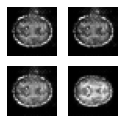

Epoch: 1003
Wall time: 16min 59s


In [3]:
%%time
# Model Training, when the SSIM meet requirement continously 3 times after 1000 epochs. The model training will stop.
hist_ssim = dcgan.train(train_dataset,10000,patience=3)
print('Epoch: '+ str(len(hist_ssim)))

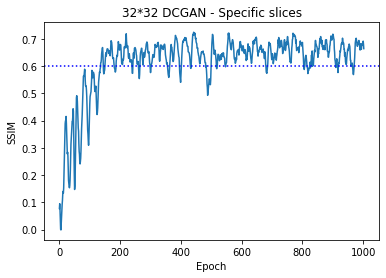

In [4]:
plt.plot(hist_ssim)
plt.title('32*32 DCGAN - Specific slices')
plt.axhline(y=0.6,ls=":",c="b")
plt.xlabel('Epoch')
plt.ylabel('SSIM')
plt.show()

## 64*64 output DCGAN using chosen sliced dataset

Now, let's see how is the 64*64 output DCGAN going.

In [5]:
# Parameters
IMG_SIZE = 64
TARGET_SLICE = list(range(5,10))

train_dataset = img_loader.load_to_tensor(target_slice=TARGET_SLICE,img_size=IMG_SIZE)
dcgan = DCGAN(IMG_SIZE,TARGET_SLICE)

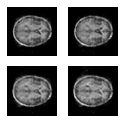

Epoch: 1003
Wall time: 54min 51s


In [6]:
%%time
hist_ssim = dcgan.train(train_dataset,10000,patience=3)
print('Epoch: '+ str(len(hist_ssim)))

0.61047137

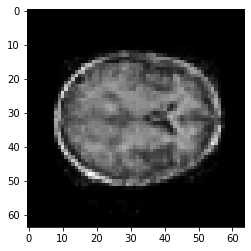

In [7]:
dcgan.load_model() # Load the latest model from checkpoints
fakes = dcgan.generate_images(256) # Generate 256 fake images
dcgan.cal_ssim(train_dataset) #Calculate mean ssim with 256 real images

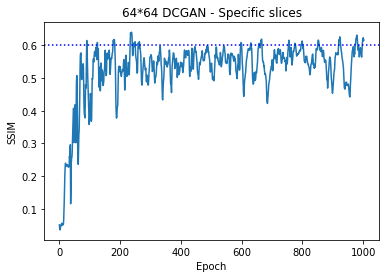

In [7]:
plt.plot(hist_ssim)
plt.title('64*64 DCGAN - Specific slices')
plt.axhline(y=0.6,ls=":",c="b")
plt.xlabel('Epoch')
plt.ylabel('SSIM')
plt.show()

## 64*64 output DCGAN using whole dataset

Using the whole dataset and 64*64 output image size. The maximum of SSIM value of 256 comparisons will be the result.

In [9]:
IMG_SIZE = 64

train_dataset = img_loader.load_to_tensor(img_size=IMG_SIZE)

dcgan = DCGAN(IMG_SIZE)

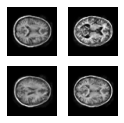

Epoch: 1003
Wall time: 5h 21min 41s


In [9]:
%%time
hist_ssim = dcgan.train(train_dataset,10000,patience=3)
print('Epoch: '+ str(len(hist_ssim)))

0.7448995

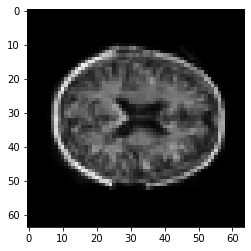

In [10]:
dcgan.load_model() # Load the latest model from checkpoints
fakes = dcgan.generate_images(256) # Generate 256 fake images
dcgan.cal_ssim(train_dataset) #Calculate mean ssim with 256 real images

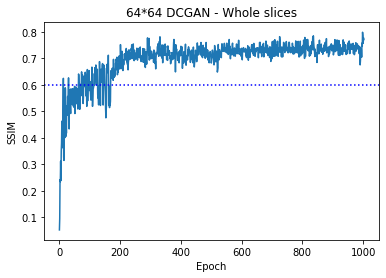

In [12]:
plt.plot(hist_ssim)
plt.title('64*64 DCGAN - Whole slices')
plt.axhline(y=0.6,ls=":",c="b")
plt.xlabel('Epoch')
plt.ylabel('SSIM')
plt.show()

## 128*128 output DCGAN using whole dataset

In [ ]:
IMG_SIZE = 128

train_dataset = img_loader.load_to_tensor(img_size=IMG_SIZE)
dcgan = DCGAN(IMG_SIZE)

In [ ]:
%%time
hist_ssim = dcgan.train(train_dataset,10000,patience=3)
print('Epoch: '+ str(len(hist_ssim)))

In [ ]:
plt.plot(hist_ssim)
plt.title('128*128 DCGAN - Whole slices')
plt.axhline(y=0.6,ls=":",c="b")
plt.xlabel('Epoch')
plt.ylabel('SSIM')
plt.show()